p値の変動を見る

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
common_GO=pd.read_csv("/Users/miyakesho/Box Sync/Personal/m6A/data/csv/phase1/GO/common/GO_term_cellline.csv")
#common_GO=common_GO[["GO_term"]]
common_GO

,GO_term,Cell_line_count
0,'de novo' IMP biosynthetic process (GO:0006189),1
1,'de novo' posttranslational protein folding (G...,2
2,'de novo' protein folding (GO:0006458),3
3,'de novo' pyrimidine nucleobase biosynthetic p...,1
4,7-methylguanosine RNA capping (GO:0009452),2
5,7-methylguanosine mRNA capping (GO:0006370),2
6,ADP metabolic process (GO:0046031),1
7,ATF6-mediated unfolded protein response (GO:00...,1
8,ATP biosynthetic process (GO:0006754),1
9,ATP generation from ADP (GO:0006757),1


In [55]:
def boxplot(cell_line):
    cell_GO=pd.read_csv("/Users/miyakesho/Box Sync/Personal/m6A/data/csv/phase1/GO/{}GO.csv".format(cell_line))
    cell_GO=cell_GO[["GO_term","Pvalue"]]
    cell_GO = cell_GO.sort_values('Pvalue')
    Data=pd.merge(common_GO,cell_GO,on="GO_term")
    Data=Data.sort_values('Pvalue')
    calculate=[]
    for i in range(0,len(Data)):
        a_col=[]
        col=Data.iloc[i]
        log=math.log10(col.Pvalue)
        a_col.append(col.GO_term)
        a_col.append(col.Cell_line_count)
        a_col.append(log)
        calculate.append(a_col)

    calculate=pd.DataFrame(calculate,columns=["GO_term","Cell_line_count","logPvalue"])

    sns.boxplot(x="Cell_line_count", y="logPvalue", data=calculate)
    plt.title(cell_line)
    plt.savefig("{}.boxplot.png".format(cell_line),dpi=300)
    plt.figure()
    

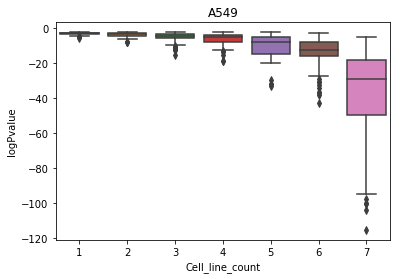

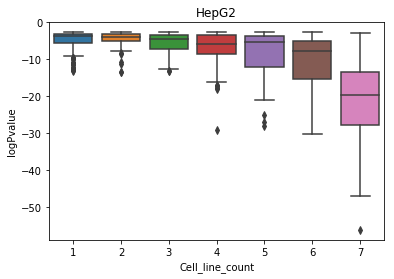

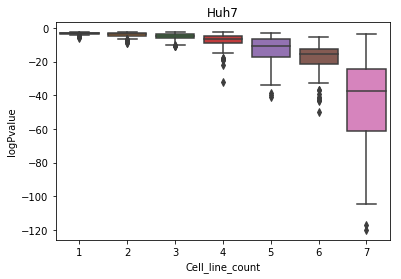

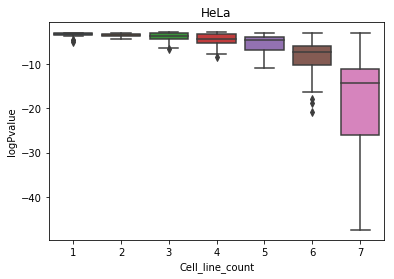

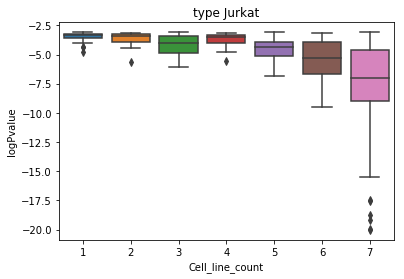

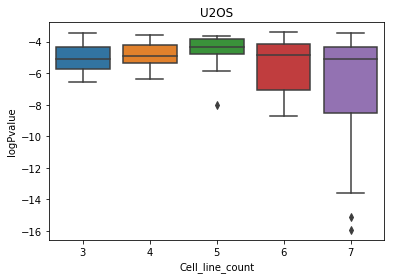

In [56]:
cell_line_list=["A549","HepG2","Huh7","HeLa","type Jurkat","U2OS"]
for cell_line in cell_line_list:
    boxplot(cell_line)


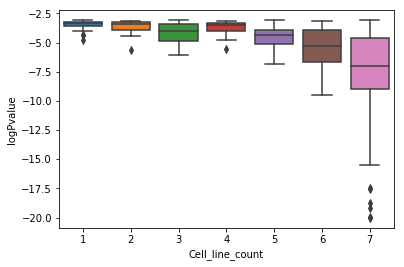

In [42]:
sns.boxplot(x="Cell_line_count", y="logPvalue", data=calculate)